In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime

In [2]:
# read data
df_bc = pd.read_csv('raw_data/bitcoin_raw.csv',index_col="Date")
df_gold = pd.read_csv('raw_data/gold_df.csv')
df_oil = pd.read_csv('raw_data/oil_price_raw.csv')
df_raw = pd.read_csv('raw_data/raw_v2_dataset.csv')
df_vix = pd.read_csv('raw_data/vixcurrent.csv')

In [3]:
df =df_bc.drop('Currency', axis=1)


In [4]:
df.head()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,
2013-10-01,123.65499,124.30466,124.75166,122.56349
2013-10-02,125.45500,123.65499,125.75850,123.63383
2013-10-03,108.58483,125.45500,125.66566,83.32833
2013-10-04,118.67466,108.58483,118.67500,107.05816
2013-10-05,121.33866,118.67466,121.93633,118.00566


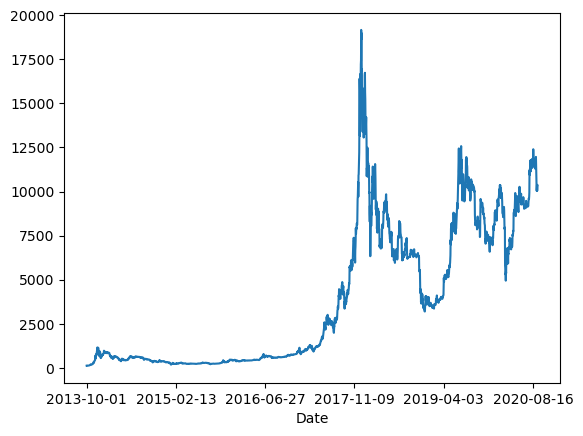

In [5]:
df['Closing Price (USD)'].plot()
plt.show()

In [6]:
df.to_csv('preprocess/df_bc.csv')

In [7]:
def amp(data):
    return (data['24h High (USD)']-data['24h Low (USD)'])/data['24h Open (USD)']

In [8]:
def change(data):
    return (data['Closing Price (USD)']-data['24h Open (USD)'])/data['24h Open (USD)']

In [9]:
df['Amp'] = df.apply(amp , axis=True)
df['Change'] = df.apply(change , axis=True)

In [10]:
df.head()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Amp,Change
Date,,,,,,
2013-10-01,123.65499,124.30466,124.75166,122.56349,0.017603,-0.005226
2013-10-02,125.45500,123.65499,125.75850,123.63383,0.017182,0.014557
2013-10-03,108.58483,125.45500,125.66566,83.32833,0.337470,-0.134472
2013-10-04,118.67466,108.58483,118.67500,107.05816,0.106984,0.092921
2013-10-05,121.33866,118.67466,121.93633,118.00566,0.033121,0.022448


In [11]:
df.drop(['24h High (USD)','24h Low (USD)'], axis=1)

,Closing Price (USD),24h Open (USD),Amp,Change
Date,,,,
2013-10-01,123.654990,124.304660,0.017603,-0.005226
2013-10-02,125.455000,123.654990,0.017182,0.014557
2013-10-03,108.584830,125.455000,0.337470,-0.134472
2013-10-04,118.674660,108.584830,0.106984,0.092921
2013-10-05,121.338660,118.674660,0.033121,0.022448
...,...,...,...,...
2020-09-07,10207.605003,10174.863432,0.033551,0.003218
2020-09-08,10381.776107,10265.742989,0.047866,0.011303
2020-09-09,10043.196441,10381.676816,0.055409,-0.032604


In [12]:
df_20 = df.rolling(100, min_periods=1).mean()
df_20

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Amp,Change
Date,,,,,,
2013-10-01,123.654990,124.304660,124.751660,122.563490,0.017603,-0.005226
2013-10-02,124.554995,123.979825,125.255080,123.098660,0.017393,0.004665
2013-10-03,119.231607,124.471550,125.391940,109.841883,0.124085,-0.041714
2013-10-04,119.092370,120.499870,123.712705,109.145952,0.119810,-0.008055
2013-10-05,119.541628,120.134828,123.357430,110.917894,0.102472,-0.001955
...,...,...,...,...,...,...
2020-09-07,10275.357619,10260.983984,10424.467162,10062.725365,0.034611,0.001720
2020-09-08,10282.292136,10269.301076,10430.968915,10068.293579,0.034668,0.001563
2020-09-09,10288.447400,10276.232445,10438.429218,10073.040205,0.034908,0.001506


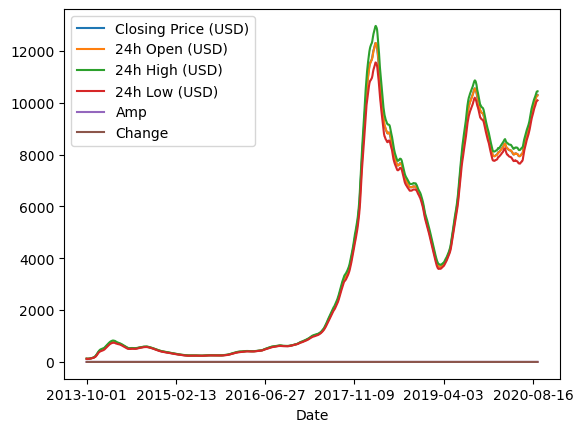

In [13]:
df_20.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

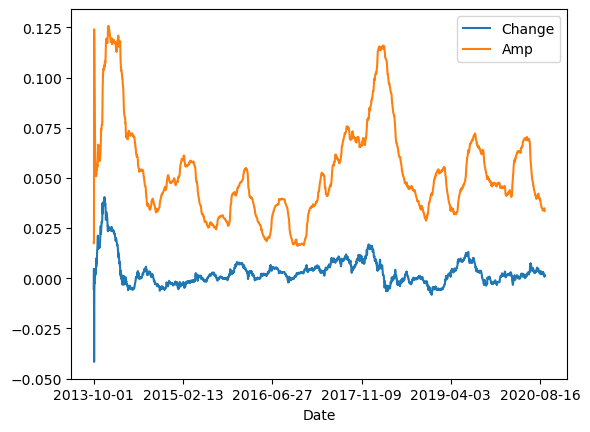

In [14]:
df_20[['Change','Amp']].plot()

In [15]:
df = df.round(4)
df.to_csv('preprocess/df_bc.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2527 entries, 2013-10-01 to 2020-09-11
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Closing Price (USD)  2527 non-null   float64
 1   24h Open (USD)       2527 non-null   float64
 2   24h High (USD)       2527 non-null   float64
 3   24h Low (USD)        2527 non-null   float64
 4   Amp                  2527 non-null   float64
 5   Change               2527 non-null   float64
dtypes: float64(6)
memory usage: 138.2+ KB


In [19]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['24h Open (USD)'],
                high=df['24h High (USD)'],
                low=df['24h Low (USD)'],
                close=df['Closing Price (USD)'])])

In [24]:
fig.update_layout( xaxis_title="Date", yaxis_title="USD",title="BTC")

fig.show()